hemispheric only is without filtering (at first) to just see the hemispheric plots

-> my theory is that filtering is messing with the cellID configuration, causing it to not plot correctly!


In [1]:
#Chunk that sloads necessary packages & sets working environment to where the jupyterlab notebook file is 
%load_ext autoreload
%autoreload 2
import gnssvod as gv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pdb
import importlib
import zipfile
import os
import xarray as xr
import glob
import shutil
from gnssvod.hemistats.hemistats import hemibuild
#import georinex as gr
from matplotlib.collections import PatchCollection
import matplotlib.dates as mdates
import shutil
from matplotlib import rcParams
from datetime import datetime, timedelta

In [2]:
#pairing and concatenating--- starting by establishing path to .nc files per station
##here MACROCOSM 5 & 1 are references
# MACROCOSM 3 is located in- gutter
#MACROCOSM 2 is located in- under exclosure
#MACROCOSM-7 is located in- coffe1
pattern={'MACROCOSM-1':'/Volumes/coraldelmar/all_data/MACROCOSM-1/nc/*.nc',
        'MACROCOSM-2':'/Volumes/coraldelmar/all_data/MACROCOSM-2/nc/*.nc',
        'MACROCOSM-3':'/Volumes/coraldelmar/all_data/MACROCOSM-3/nc/*.nc',
        'MACROCOSM-5':'/Volumes/coraldelmar/all_data/MACROCOSM-5/nc/*.nc',
        'MACROCOSM-7':'/Volumes/coraldelmar/all_data/MACROCOSM-7/nc/*.nc'}

In [3]:
startday = start=pd.to_datetime('01-01-2025',format='%d-%m-%Y')
timeintervals=pd.interval_range(start=startday, periods=150, freq='D', closed='left')
timeintervals

IntervalIndex([[2025-01-01 00:00:00, 2025-01-02 00:00:00),
               [2025-01-02 00:00:00, 2025-01-03 00:00:00),
               [2025-01-03 00:00:00, 2025-01-04 00:00:00),
               [2025-01-04 00:00:00, 2025-01-05 00:00:00),
               [2025-01-05 00:00:00, 2025-01-06 00:00:00),
               [2025-01-06 00:00:00, 2025-01-07 00:00:00),
               [2025-01-07 00:00:00, 2025-01-08 00:00:00),
               [2025-01-08 00:00:00, 2025-01-09 00:00:00),
               [2025-01-09 00:00:00, 2025-01-10 00:00:00),
               [2025-01-10 00:00:00, 2025-01-11 00:00:00),
               ...
               [2025-05-21 00:00:00, 2025-05-22 00:00:00),
               [2025-05-22 00:00:00, 2025-05-23 00:00:00),
               [2025-05-23 00:00:00, 2025-05-24 00:00:00),
               [2025-05-24 00:00:00, 2025-05-25 00:00:00),
               [2025-05-25 00:00:00, 2025-05-26 00:00:00),
               [2025-05-26 00:00:00, 2025-05-27 00:00:00),
               [2025-05-27 00:00:00, 

In [4]:
ds=xr.open_mfdataset('/Volumes/coraldelmar/all_data/MACROCOSM-1.5/*.nc',combine='nested',concat_dim='Epoch')
ds

<xarray.Dataset> Size: 60MB
Dimensions:    (Station: 2, Epoch: 5760, SV: 108)
Coordinates:
  * Station    (Station) <U11 88B 'MACROCOSM-1' 'MACROCOSM-5'
  * SV         (SV) <U3 1kB 'C11' 'C12' 'C14' 'C19' ... 'R23' 'R24' 'R26' 'S31'
  * Epoch      (Epoch) datetime64[ns] 46kB 2025-01-15 ... 2025-01-16T23:59:30
Data variables:
    S1C        (Station, Epoch, SV) float64 10MB dask.array<chunksize=(2, 2880, 107), meta=np.ndarray>
    S1X        (Station, Epoch, SV) float64 10MB dask.array<chunksize=(2, 2880, 107), meta=np.ndarray>
    S2C        (Station, Epoch, SV) float64 10MB dask.array<chunksize=(2, 2880, 107), meta=np.ndarray>
    S2X        (Station, Epoch, SV) float64 10MB dask.array<chunksize=(2, 2880, 107), meta=np.ndarray>
    Azimuth    (Station, Epoch, SV) float64 10MB dask.array<chunksize=(2, 2880, 107), meta=np.ndarray>
    Elevation  (Station, Epoch, SV) float64 10MB dask.array<chunksize=(2, 2880, 107), meta=np.ndarray>

In [5]:
df=ds.to_dataframe().dropna(how='all').reorder_levels(["Station","Epoch","SV"]).sort_index()
df

S1C   S1X   S2C  S2X  Azimuth  Elevation
Station     Epoch               SV                                            
MACROCOSM-1 2025-01-15 00:00:00 C19   NaN   NaN   NaN  NaN     87.6       39.6
                                C26   NaN   NaN   NaN  NaN   -104.3       44.6
                                C35   NaN   NaN   NaN  NaN      0.7       44.3
                                E10   NaN  28.8   NaN  NaN     25.6       32.3
                                E11   NaN  27.5   NaN  NaN     -4.3       50.7
...                                   ...   ...   ...  ...      ...        ...
MACROCOSM-5 2025-01-16 23:59:30 R11  49.6   NaN  44.0  NaN   -142.8       50.5
                                R12  45.9   NaN  41.5  NaN    -52.7       36.2
                                R21  32.5   NaN  31.2  NaN     26.6       23.0
                                R22  44.0   NaN  39.9  NaN    -35.5       31.1
                                R23  34.2   NaN   NaN  NaN      NaN        NaN

[220357 rows x 6 columns]

In [6]:
hemi=gv.hemibuild(4)
hemi

In [7]:
hemi.grid

,azi,ele,azimin,azimax,elemin,elemax
CellID,,,,,,
0,0.000000,90.0,0.000000,360.000000,88.0,90.0
1,22.500000,86.0,0.000000,45.000000,84.0,88.0
2,67.500000,86.0,45.000000,90.000000,84.0,88.0
3,112.500000,86.0,90.000000,135.000000,84.0,88.0
4,157.500000,86.0,135.000000,180.000000,84.0,88.0
...,...,...,...,...,...,...
1523,345.789474,6.0,344.210526,347.368421,4.0,8.0
1524,348.947368,6.0,347.368421,350.526316,4.0,8.0
1525,352.105263,6.0,350.526316,353.684211,4.0,8.0


In [8]:
patches=hemi.patches()
patches

CellID
0       Rectangle(xy=(0, 0), width=6.28319, height=2, ...
1       Rectangle(xy=(0, 2), width=0.785398, height=4,...
2       Rectangle(xy=(0.785398, 2), width=0.785398, he...
3       Rectangle(xy=(1.5708, 2), width=0.785398, heig...
4       Rectangle(xy=(2.35619, 2), width=0.785398, hei...
                              ...                        
1523    Rectangle(xy=(6.00761, 82), width=0.0551157, h...
1524    Rectangle(xy=(6.06272, 82), width=0.0551157, h...
1525    Rectangle(xy=(6.11784, 82), width=0.0551157, h...
1526    Rectangle(xy=(6.17295, 82), width=0.0551157, h...
1527    Rectangle(xy=(6.22807, 82), width=0.0551157, h...
Name: Patches, Length: 1528, dtype: object

In [9]:
newdf=hemi.add_CellID(df)

In [10]:
newdf

S1C   S1X   S2C  S2X  Azimuth  \
Station     Epoch               SV                                    
MACROCOSM-1 2025-01-15 00:00:00 C19   NaN   NaN   NaN  NaN     87.6   
                                C26   NaN   NaN   NaN  NaN   -104.3   
                                C35   NaN   NaN   NaN  NaN      0.7   
                                E10   NaN  28.8   NaN  NaN     25.6   
                                E11   NaN  27.5   NaN  NaN     -4.3   
...                                   ...   ...   ...  ...      ...   
MACROCOSM-5 2025-01-16 23:59:30 R07  43.1   NaN  35.6  NaN    134.8   
                                R11  49.6   NaN  44.0  NaN   -142.8   
                                R12  45.9   NaN  41.5  NaN    -52.7   
                                R21  32.5   NaN  31.2  NaN     26.6   
                                R22  44.0   NaN  39.9  NaN    -35.5   

                                     Elevation  CellID  
Station     Epoch               SV                      
MACROCOSM-1 2025-01-15 00:00:00 C19       39.6     609  
                                C26       44.6     479  
                                C35       44.3     423  
                                E10       32.3     684  
                                E11       50.7     422  
...                                        ...     ...  
MACROCOSM-5 2025-01-16 23:59:30 R07       31.2     810  
                                R11       50.5     393  
                                R12       36.2     664  
                                R21       23.0     982  
                                R22       31.1     862  

[211742 rows x 7 columns]

In [11]:
hemi_average=newdf.groupby(['CellID','Station']).mean()
hemi_average

S1C        S1X        S2C        S2X    Azimuth  \
CellID Station                                                              
0      MACROCOSM-1        NaN  18.827778        NaN        NaN -87.837778   
       MACROCOSM-5  47.927273  45.142857  42.740909        NaN -23.048352   
1      MACROCOSM-1  28.384615        NaN        NaN  27.550000  22.073438   
       MACROCOSM-5  47.534615  45.757895  41.175000  45.365625  22.362037   
2      MACROCOSM-1  26.092593        NaN        NaN  27.800000  63.246154   
...                       ...        ...        ...        ...        ...   
1517   MACROCOSM-5  27.333333  26.400000  25.257143        NaN -33.852941   
1518   MACROCOSM-1  22.760000        NaN        NaN        NaN -30.360000   
       MACROCOSM-5  21.962500        NaN  25.350000        NaN -28.812500   
1519   MACROCOSM-1  25.550000        NaN  17.000000        NaN -27.500000   
       MACROCOSM-5  25.779775        NaN  23.010000        NaN -27.367416   

                    Elevation  
CellID Station                 
0      MACROCOSM-1  88.833333  
       MACROCOSM-5  88.752747  
1      MACROCOSM-1  85.714063  
       MACROCOSM-5  85.793519  
2      MACROCOSM-1  86.684615  
...                       ...  
1517   MACROCOSM-5   7.088235  
1518   MACROCOSM-1   5.840000  
       MACROCOSM-5   4.900000  
1519   MACROCOSM-1   7.654545  
       MACROCOSM-5   6.200000  

[2471 rows x 6 columns]

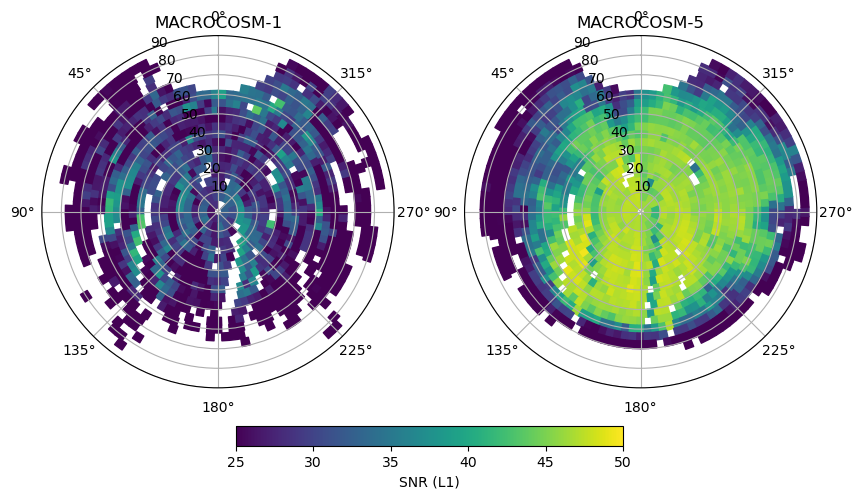

In [12]:
fig, ax = plt.subplots(1,2,figsize=(10,10),subplot_kw=dict(projection='polar'))

station_names = df.index.get_level_values('Station').unique()
for i, iname in enumerate(station_names):
    # associate the mean values to the patches, join inner will drop patches with no data, making plotting slightly faster
    ipatches = pd.concat([patches,hemi_average.xs(iname, level='Station')],join='inner',axis=1)
    # plotting with colored patches
    pc = PatchCollection(ipatches.Patches,array=ipatches.S1C,edgecolor='face', linewidth=1)
    pc.set_clim([25,50])
    ax[i].add_collection(pc)
    ax[i].set_rlim([0,90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_title(iname)

plt.colorbar(pc, ax=ax, location='bottom', shrink=.5, pad=0.05, label='SNR (L1)')
#plt.savefig('figures/illustration_snr.png',facecolor='white', transparent=False,bbox_inches='tight')

In [13]:
pattern='/Volumes/coraldelmar/all_data/MACROCOSM-1.5/*.nc'
pairings={'MACROCOSM-1.5':('MACROCOSM-1','MACROCOSM-5')}
bands={'VOD1':['S1C','S1X'],'VOD2':['S2C','S2X']}
vod=gv.calc_vod(pattern,pairings,bands)
vod=vod['MACROCOSM-1.5']
vod

VOD1  VOD2  Azimuth  Elevation
Epoch               SV                                     
2025-01-16 00:00:00 E23 -5.321514   NaN    179.9       77.2
                    G06 -3.614589   NaN    -52.0       49.0
                    G14 -4.462150   NaN    167.8       60.8
                    G17 -3.985555   NaN     33.8       49.1
                    G19 -2.840434   NaN    -11.3       42.1
...                           ...   ...      ...        ...
2025-01-15 23:59:30 G14 -3.467230   NaN    167.7       61.1
                    G17 -2.854284   NaN     33.4       49.1
                    G19 -1.771840   NaN    -11.6       42.0
                    R05 -0.335804   NaN     68.7       25.4
                    R21 -1.963111   NaN    -34.7       30.1

[59441 rows x 4 columns]

In [14]:
hemi=gv.hemibuild(2)
patches=hemi.patches()
vod=hemi.add_CellID(vod).drop(columns=['Azimuth','Elevation'])
vod_avg=vod.groupby(['CellID']).agg(['mean','std','count'])
vod_avg.columns=["_".join(x) for x in vod_avg.columns.to_flat_index()]
vod_avg

,VOD1_mean,VOD1_std,VOD1_count,VOD2_mean,VOD2_std,VOD2_count
CellID,,,,,,
0,-6.182160,0.116188,8,NaN,NaN,0
1,-4.427624,1.570352,6,-4.140265,0.022663,3
2,-4.304484,1.334870,13,-4.172404,0.073639,6
3,-4.342513,1.490443,13,-4.104693,0.123069,7
5,-6.118573,0.323042,10,NaN,NaN,0
...,...,...,...,...,...,...
6237,NaN,NaN,0,-0.066364,NaN,1
6413,-0.005303,NaN,1,NaN,NaN,0
6423,-0.093996,NaN,1,NaN,NaN,0


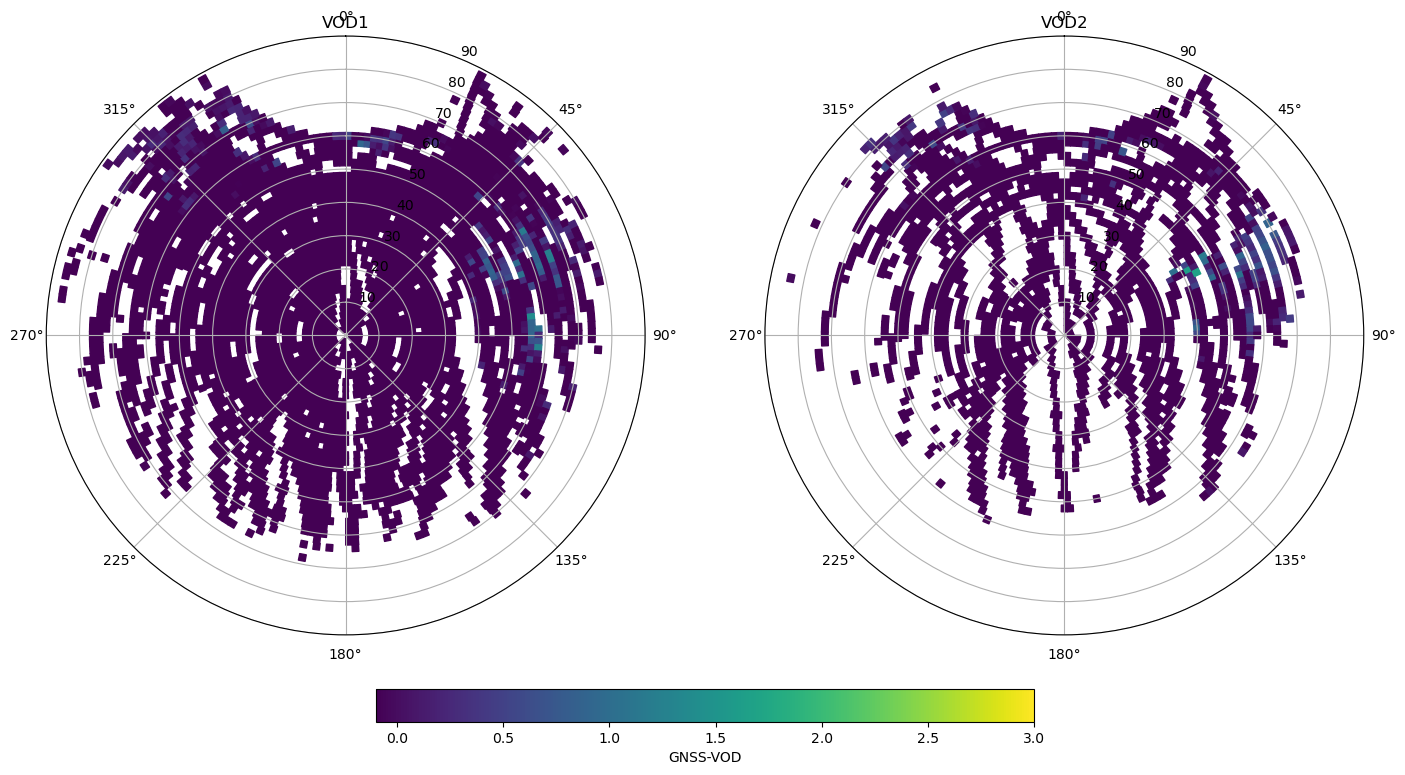

In [15]:
fig, ax = plt.subplots(1,2,figsize=(17,14),subplot_kw=dict(projection='polar'))

vod_names = ['VOD1','VOD2']
for i, iname in enumerate(vod_names):
    # associate the mean values to the patches, join inner will drop patches with no data, making plotting slightly faster
    ipatches = pd.concat([patches,vod_avg[f"{iname}_mean"]],join='inner',axis=1)
    # plotting with colored patches
    pc = PatchCollection(ipatches.Patches,array=ipatches[f"{iname}_mean"],edgecolor='face', linewidth=1)
    pc.set_clim([-0.1,3])
    ax[i].add_collection(pc)
    ax[i].set_rlim([0,90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_theta_direction(-1)
    ax[i].set_title(iname)

plt.colorbar(pc, ax=ax, location='bottom', shrink=.5, pad=0.05, label='GNSS-VOD')

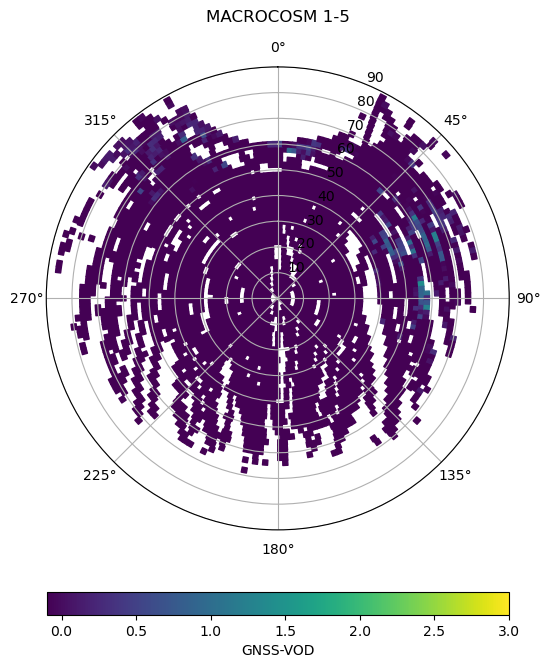

In [16]:
fig, ax = plt.subplots(figsize=(8, 7), subplot_kw=dict(projection='polar'))

iname = 'VOD1'

# Associate the mean values to the patches
ipatches = pd.concat([patches, vod_avg[f"{iname}_mean"]], join='inner', axis=1)

# Plot with colored patches
pc = PatchCollection(ipatches.Patches, array=ipatches[f"{iname}_mean"], edgecolor='face', linewidth=1)
pc.set_clim([-0.1, 3])
ax.add_collection(pc)

# Configure the polar plot
ax.set_rlim([0, 90])
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_title("MACROCOSM 1-5", y=1.08)

# Add colorbar
plt.colorbar(pc, ax=ax, location='bottom', shrink=.6, pad=0.1, label='GNSS-VOD')
plt.tight_layout()
plt.show()
